# Tanzanian Wells

## 1. Overview

This notebook examines Tanzania's water wells, and uses classification models to predict whether a water point is non-fonctional.<br>
The organization of this notebook follows the CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process.

## 2. Business Understanding

Tanzania, a developing country with a population of over 57,000,000, faces significant challenges in providing clean and reliable water sources to its citizens. The country has a substantial number of existing water points, including water wells, but a considerable portion of these wells either require maintenance or have completely failed, resulting in limited access to clean water.

The objective of this project is to develop a machine learning classifier that can predict if a water well in Tanzania is non functional. By analyzing various factors such as the type of pump, when and who installed it, who manages it and other relevant attributes, we aim to categorize wells into different conditions, such as 'functional' or 'non-functional'. 

This predictive model will serve as a valuable tool for organizations and government agencies involved in water resource management and infrastructure development in Tanzania.

The target audience for this project is Non-Governmental Organizations (NGOs) focusing on improving access to clean water in Tanzania such as [WaterAid](https://www.wateraid.org/where-we-work/tanzania), [Charity Water](https://www.charitywater.org/our-projects/tanzania) or [Tanzania Water Project](https://www.tanzaniawaterproject.org/). 

## 3. Data Understanding

The data comes from drivendata.org, a platform which hosts data science competitions with a focus on social impact. The source of data provided by DrivenData is the Tanzanian Ministry of Water, and is stored by Taarifa. 

The actual dataset can be found [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) under the 'Data download section'. 

4 files are indicated. The below files were downloaded and renamed as follows:
- Training set values: training_set_values
- Training set labels: training_set_labels
- Test set values: test_set_values

These are the files used for the main modeling and predictive analysis. 
<br>
The test set values file is the one used to measure the accuracy of the model.

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Loading training_set_values dataset and saving it as df_values
df_values = pd.read_csv('data/training_set_values.csv')

In [3]:
# Inspecting df_values
df_values

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... payment_type water_quality quality_group      quantity  \
0      ...     annually          soft          good        enough   
1      ...    never pay          soft          good  insufficient   
2      ...   per bucket          soft          good        enough   
3      ...    never pay          soft          good           dry   
4      ...    never pay          soft          good      seasonal   
...    ...          ...           ...           ...           ...   
59395  ...   per bucket          soft          good        enough   
59396  ...     annually          soft          good        enough   
59397  ...      monthly      fluoride      fluoride        enough   
59398  ...    never pay          soft          good  insufficient   
59399  ...   on failure         salty         salty        enough   

       quantity_group                source           source_type  \
0              enough                spring                spring   
1        insufficient  rainwater harvesting  rainwater harvesting   
2              enough                   dam                   dam   
3                 dry           machine dbh              borehole   
4            seasonal  rainwater harvesting  rainwater harvesting   
...               ...                   ...                   ...   
59395          enough                spring                spring   
59396          enough                 river            river/lake   
59397          enough           machine dbh              borehole   
59398    insufficient          shallow well          shallow well   
59399          enough          shallow well          shallow well   

       source_class              waterpoint_type waterpoint_type_group  
0       groundwater           communal standpipe    communal standpipe  
1           surface           communal standpipe    communal standpipe  
2           surface  communal standpipe multiple    communal standpipe  
3       groundwater  communal standpipe multiple    communal standpipe  
4           surface           communal standpipe    communal standpipe  
...             ...                          ...                   ...  
59395   groundwater        

The training set values has 59,400 rows, with 39 feature columns and 1 id column.

* `amount_tsh`: Total static head (amount water available to waterpoint)
* `date_recorded`: The date the row was entered
* `funder`: Who funded the well
* `gps_height`: Altitude of the well
* `installer`: Organization that installed the well
* `longitude`: GPS coordinate
* `latitude`: GPS coordinate
* `wpt_name`: Name of the waterpoint if there is one
* `num_private`: No description was provided for this feature
* `basin`: Geographic water basin
* `subvillage`: Geographic location
* `region`: Geographic location
* `region_code`: Geographic location (coded)
* `district_code`: Geographic location (coded)
* `lga`: Geographic location
* `ward`: Geographic location
* `population`: Population around the well
* `public_meeting`: True/False
* `recorded_by`: Group entering this row of data
* `scheme_management`: Who operates the waterpoint
* `scheme_name`: Who operates the waterpoint
* `permit`: If the waterpoint is permitted
* `construction_year`: Year the waterpoint was constructed
* `extraction_type`: The kind of extraction the waterpoint uses
* `extraction_type_group`: The kind of extraction the waterpoint uses
* `extraction_type_class`: The kind of extraction the waterpoint uses
* `management`: How the waterpoint is managed
* `management_group`: How the waterpoint is managed
* `payment`: What the water costs
* `payment_type`: What the water costs
* `water_quality`: The quality of the water
* `quality_group`: The quality of the water
* `quantity`: The quantity of water
* `quantity_group`: The quantity of water
* `source`: The source of the water
* `source_type`: The source of the water
* `source_class`: The source of the water
* `waterpoint_type`: The kind of waterpoint
* `waterpoint_type_group`: The kind of waterpoint

In [4]:
# Loading training_set_values dataset and saving it as df_labels
df_labels = pd.read_csv('data/training_set_labels.csv')

In [5]:
# Inspecting df_labels
df_labels

id    status_group
0      69572      functional
1       8776      functional
2      34310      functional
3      67743  non functional
4      19728      functional
...      ...             ...
59395  60739      functional
59396  27263      functional
59397  37057      functional
59398  31282      functional
59399  26348      functional

[59400 rows x 2 columns]

In [6]:
# Checking the unique values of the target column
df_labels['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

The training set labels has the same number of rows, and contains the:
* `id` 
* `target column`: status group

The status group can be defined as: 

1. functional: the waterpoint is operational and there are no repairs needed
2. functional needs repair: the waterpoint is operational, but needs repairs
3. non functional: the waterpoint is not operational

## 4. Data Preparation

### 4. a. Joining values and labels datasets together

The first step of preparing the data is to merge both df_values and df_labels, as the latter contains the target value.
<br>
Both datasets are merged on the 'id' column.

In [7]:
# Merging both dataframes on the column 'id'
raw_df = df_values.merge(df_labels, on='id')

In [8]:
# Inspecting the new dataframe
raw_df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... water_quality quality_group      quantity  quantity_group  \
0      ...          soft          good        enough          enough   
1      ...          soft          good  insufficient    insufficient   
2      ...          soft          good        enough          enough   
3      ...          soft          good           dry             dry   
4      ...          soft          good      seasonal        seasonal   
...    ...           ...           ...           ...             ...   
59395  ...          soft          good        enough          enough   
59396  ...          soft          good        enough          enough   
59397  ...      fluoride      fluoride        enough          enough   
59398  ...          soft          good  insufficient    insufficient   
59399  ...         salty         salty        enough          enough   

                     source           source_type source_class  \
0                    spring                spring  groundwater   
1      rainwater harvesting  rainwater harvesting      surface   
2                       dam                   dam      surface   
3               machine dbh              borehole  groundwater   
4      rainwater harvesting  rainwater harvesting      surface   
...                     ...                   ...          ...   
59395                spring                spring  groundwater   
59396                 river            river/lake      surface   
59397           machine dbh              borehole  groundwater   
59398          shallow well          shallow well  groundwater   
59399          shallow well          shallow well  groundwater   

                   waterpoint_type waterpoint_type_group    status_group  
0               communal standpipe    communal standpipe      functional  
1               communal standpipe    communal standpipe      functional  
2      communal standpipe multiple    communal standpipe      functional  
3      communal standpipe multiple    communal standpipe  non functional  
4               communal standpipe    communal standpipe      functional  
...                            ...                   ...             ...  
59395        

The new joined dataframe contains the same number of rows as the previous datasets: 59,400. It has 1 id column, 1 target column: status_group, and 39 feature columns.

### 4. b. Data transformation & cleaning

Data transformation and cleaning are an important step because they ensure the accuracy and reliability of data, which, in turn, improves the quality of models. Clean data intends to reduce bias and errors, making predictions more accurate and reliable.

#### 4. b. 1. Verifying and handling missing data 

In [9]:
# Checking for null values
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The column `scheme_name` has a high number of null values and is contains the same information as `scheme_management`: who operates the waterpoint.  
As a consequence, it will be dropped entirely.

In [10]:
# Dropping the column scheme_name
raw_df.drop(['scheme_name'], axis=1, inplace=True)

In [11]:
# Inspecting the values of columns containing null information 
columns_with_null = raw_df.columns[raw_df.isnull().any()].tolist()

columns_with_null

for column in columns_with_null:
    print(column)
    print(raw_df[column].unique())
    print()

funder
['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']

installer
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']

subvillage
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']

public_meeting
[True nan False]

scheme_management
['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']

permit
[False True nan]



Other columns' null values will be replaced by 'Unknown' as they contain a relatively few missing values, and handling them as 'Unknown' could be used to predict whether a well is functional or not.  

In [12]:
# Filling null values with 'Unknown'
for column in columns_with_null:
    raw_df[column].fillna('Unknown', inplace=True)

In [13]:
# Verifying the dataset no longer contains any null value
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### 4. b. 2. Removing unnecessary columns

The below  columns will be removed for the following reasons:

1. Irrelevant for predictions (i.e. date the row was entered, waterpoint name)
2. Contains similar information as another column (i.e. extraction_type, water_quality) 
3. Contains information which would require additional conversion (i.e. region_code, district_code)

* `id`: the identification number assigned to the water well 
* `date_recorded`: The date the row was entered
* `longitude`: GPS coordinate
* `latitude`: GPS coordinate
* `wpt_name`: Name of the waterpoint if there is one
* `num_private`: undefined
* `subvillage`: Geographic location
* `region_code`: Geographic location (coded)
* `region`: Geographic location. There are 21 regions, while location by basin can be provided with 9 categories. Choosing less detailed categories is preferred to prevent creating a sparse dataframe 
* `district_code`: Geographic location (coded)
* `lga`: Geographic location
* `ward`: Geographic location
* `recorded_by`: Group entering this row of data
* `scheme_management`: Who operates the waterpoint
* `extraction_type`: The kind of extraction the waterpoint uses
* `extraction_type_group`: The kind of extraction the waterpoint uses
* `management_group`: How the waterpoint is managed
* `payment`: What the water costs
* `payment_type`: Frequency of payment: while it would be interesting to understand link between payment and well functionality, this feature has no link with the quality of water type and should be investigated separately
* `water_quality`: The quality of the water
* `quantity_group`: The quantity of water
* `source`: The source of the water
* `source_class`: The source of the water
* `waterpoint_type`: The kind of waterpoint
* `waterpoint_type_group`: provides similar information as source type and extraction type

In [14]:
# Storing the columns defined above into a list 
columns_to_drop = ['id', 'date_recorded','longitude','latitude','wpt_name','num_private','subvillage','region_code', 'region','district_code','lga','ward','recorded_by','scheme_management','extraction_type','extraction_type_group','management_group','payment', 'payment_type', 'water_quality','quantity_group','source','source_class','waterpoint_type', 'waterpoint_type_group']

In [15]:
# Dropping the columns from the dataframe and creating a new one
df = raw_df.drop(columns_to_drop, axis=1)

In [16]:
# Inspecting the new df
df

amount_tsh           funder  gps_height     installer  \
0          6000.0            Roman        1390         Roman   
1             0.0          Grumeti        1399       GRUMETI   
2            25.0     Lottery Club         686  World vision   
3             0.0           Unicef         263        UNICEF   
4             0.0      Action In A           0       Artisan   
...           ...              ...         ...           ...   
59395        10.0  Germany Republi        1210           CES   
59396      4700.0      Cefa-njombe        1212          Cefa   
59397         0.0          Unknown           0       Unknown   
59398         0.0            Malec           0          Musa   
59399         0.0       World Bank         191         World   

                         basin  population public_meeting permit  \
0                   Lake Nyasa         109           True  False   
1                Lake Victoria         280        Unknown   True   
2                      Pangani         250           True   True   
3      Ruvuma / Southern Coast          58           True   True   
4                Lake Victoria           0           True   True   
...                        ...         ...            ...    ...   
59395                  Pangani         125           True   True   
59396                   Rufiji          56           True   True   
59397                   Rufiji           0           True  False   
59398                   Rufiji           0           True   True   
59399              Wami / Ruvu         150           True   True   

       construction_year extraction_type_class   management quality_group  \
0                   1999               gravity          vwc          good   
1                   2010               gravity          wug          good   
2                   2009               gravity          vwc          good   
3                   1986           submersible          vwc          good   
4                      0               gravity        other          good   
...                  ...                   ...          ...           ...   
59395               1999               gravity  water board          good   
59396               1996               gravity          vwc          good   
59397                  0              handpump          vwc      fluoride   
59398                  0              handpump          vwc          good   
59399               2002              handpump          vwc         salty   

           quantity           source_type    status_group  
0            enough                spring      functional  
1      insufficient  rainwater harvesting      functional  
2            enough                   dam      functional  
3               dry              borehole  non functional  
4          seasonal  rainwater harvesting      functional  
...             ...                   ...             ...  
59395        enough                spring      functional  
59396        enough            river/lake      functional  
59397        enough              borehole      functional  
59398  insufficient          shallow well      functional  
59399        enough          shallow well      functional  

[59400 rows x 15 columns]

In [17]:
# Inspecting the new df's info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   basin                  59400 non-null  object 
 5   population             59400 non-null  int64  
 6   public_meeting         59400 non-null  object 
 7   permit                 59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  management             59400 non-null  object 
 11  quality_group          59400 non-null  object 
 12  quantity               59400 non-null  object 
 13  source_type            59400 non-null  object 
 14  status_group           59400 non-null  object 
dtypes:

The new dataframe still has 59,400 rows, but now contains 17 feature columns and 1 target column. 
14 of the features, including the target variable is a categorical data, so they will be one-hot encoded in the next section.

#### 4. b. 3. Transforming the classification into a binary one

* **Addressing imbalanced dataset - part 1**

The target column contains 3 categories. The dataset is highly imbalanced, and the status 'functional needs repair' only represents 7% of the rows. 


A well that is functional but needs repair can be considered non-functional because it does not reliably provide safe and consistent access to water, which is the primary function of a well. <br> 
As a consequence, all 'functional needs repair' statuses will be replaced by 'non functional,'

Transforming the classification from a ternary to a binary one will then address the imbalanced dataset. 

In [18]:
# Inspecting the values inside the column status_group
print(df['status_group'].unique())

['functional' 'non functional' 'functional needs repair']


In [19]:
# Verifying for data imbalance
print('Functional counts')
print(df['status_group'].value_counts())
print()
print()
print('Functional counts')
print(df['status_group'].value_counts(normalize=True))

Functional counts
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


Functional counts
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


The dataset is highly imbalanced, and the status 'functional needs repair' only represents 7% of the rows. 


A well that is functional but needs repair can be considered non-functional because it does not reliably provide safe and consistent access to water, which is the primary function of a well. <br> 
As a consequence, all 'functional needs repair' statuses will be replaced by 'non functional,'

Transforming the classification from a ternary to a binary one will start addressing the imbalanced dataset. 

In [20]:
# Replacing 'functional needs repair' by 'non functional'
df['status_group'] = df['status_group'].replace('functional needs repair', 
                                                'non functional')


In [21]:
# Verifying the replacement was correctly applied
print('Raw counts')
print(df['status_group'].value_counts())
print()
print()
print('Percentages')
print(df['status_group'].value_counts(normalize=True))

Raw counts
functional        32259
non functional    27141
Name: status_group, dtype: int64


Percentages
functional        0.543081
non functional    0.456919
Name: status_group, dtype: float64


If we had a model that *always* said  that the well was non functional, we would get an accuracy score of 0.456919, i.e. 45.7% accuracy, because about 45.7% of all wells are currently non functional. 

#### 4. b. 4. Converting other binary columns

Some categorical features are binary: true or false, so they will be replaced by:
* 0 if false
* 1 if true
<br>Some of the data contains 'unknown' data. If unknown, it will be considered false. 

The target column is not technically true or false but is binary as well, so it will be converted as the following:
* non functional: 1
* functional: 0 

We are choosing to predict whether a well is **non functional** or not, so the positive result (or 1) would be if the well was identified as non functional. 
This classification is due to the context we are working on. It is more important to understand whether a well is non functional and needs to be repaired, as lives depend on it. A population depending on a well could become sick or may die if they drank the water from a non fonctional well. 

This is why non functional becomes 1: it is what we are trying to predict. 

In [22]:
# Storing binary columns into a new dataframe
binary_columns = ['public_meeting', 'permit', 'status_group']

In [23]:
# Converting public_meeting, permit and status_group to binary encoding
for column in binary_columns:
    print('Before: '+ column, df[column].unique())
    df[column] = df[column].map({
        False: 0,
        True: 1,
        'Unknown': 0,
        'non functional': 1,
#         'functional needs repair': 0,
        'functional': 0

    }) 
    print('After: '+ column, df[column].unique())


Before: public_meeting [True 'Unknown' False]
After: public_meeting [1 0]
Before: permit [False True 'Unknown']
After: permit [0 1]
Before: status_group ['functional' 'non functional']
After: status_group [0 1]


In [24]:
# Verifying the new data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   basin                  59400 non-null  object 
 5   population             59400 non-null  int64  
 6   public_meeting         59400 non-null  int64  
 7   permit                 59400 non-null  int64  
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  management             59400 non-null  object 
 11  quality_group          59400 non-null  object 
 12  quantity               59400 non-null  object 
 13  source_type            59400 non-null  object 
 14  status_group           59400 non-null  int64  
dtypes:

There are now 11 categorical columms. 

#### 4. b. 5. Categorizing Values With Too Many Details

##### First step: Counting Values in Categorical Variables

Some categorical variables such as funder or installer cannot be one-hot encoded directly, as they contain too many distinct values. Further data transformation is required.

In [25]:
# Creating the dataframe categoricals to handle the categorical columns
categoricals = df.select_dtypes(include=[object])
categoricals

funder     installer                    basin  \
0                Roman         Roman               Lake Nyasa   
1              Grumeti       GRUMETI            Lake Victoria   
2         Lottery Club  World vision                  Pangani   
3               Unicef        UNICEF  Ruvuma / Southern Coast   
4          Action In A       Artisan            Lake Victoria   
...                ...           ...                      ...   
59395  Germany Republi           CES                  Pangani   
59396      Cefa-njombe          Cefa                   Rufiji   
59397          Unknown       Unknown                   Rufiji   
59398            Malec          Musa                   Rufiji   
59399       World Bank         World              Wami / Ruvu   

      extraction_type_class   management quality_group      quantity  \
0                   gravity          vwc          good        enough   
1                   gravity          wug          good  insufficient   
2                   gravity          vwc          good        enough   
3               submersible          vwc          good           dry   
4                   gravity        other          good      seasonal   
...                     ...          ...           ...           ...   
59395               gravity  water board          good        enough   
59396               gravity          vwc          good        enough   
59397              handpump          vwc      fluoride        enough   
59398              handpump          vwc          good  insufficient   
59399              handpump          vwc         salty        enough   

                source_type  
0                    spring  
1      rainwater harvesting  
2                       dam  
3                  borehole  
4      rainwater harvesting  
...                     ...  
59395                spring  
59396            river/lake  
59397              borehole  
59398          shallow well  
59399          shallow well  

[59400 rows x 8 columns]

In [26]:
# Storing categorical columns to a list
categorical_columns = categoricals.columns.tolist()
# Creating an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterating through each categorical column and calculating value counts
for column in categorical_columns:
    value_counts = categoricals[column].value_counts()
    value_counts_dict[column]=value_counts

In [27]:
# Reviewing columns with the highest number of categories within each of them 
value_counts_dict

{'funder': Government Of Tanzania    9084
 Unknown                   3639
 Danida                    3114
 Hesawa                    2202
 Rwssp                     1374
                           ... 
 Muwasa                       1
 Msigw                        1
 Rc Mofu                      1
 Overland High School         1
 Samlo                        1
 Name: funder, Length: 1897, dtype: int64,
 'installer': DWE           17402
 Unknown        3658
 Government     1825
 RWE            1206
 Commu          1060
               ...  
 EWE               1
 SCHOO             1
 Got               1
 Fabia             1
 SELEPTA           1
 Name: installer, Length: 2145, dtype: int64,
 'basin': Lake Victoria              10248
 Pangani                     8940
 Rufiji                      7976
 Internal                    7785
 Lake Tanganyika             6432
 Wami / Ruvu                 5987
 Lake Nyasa                  5085
 Ruvuma / Southern Coast     4493
 Lake Rukwa             

Funder and Installer are the two columns with the highest number of categories and seem to have very similar results. We will first focus on funders. 


##### Second step: Categorizing Columns Requiring It

<u>Funders</u> like any column, contains 59,400 rows. It is formed by 1,897 unique values. In order to organize them into similar categories, a research of each funder was done to identify if the organization was considered:
1. **Bilateral**: the government from another country funded the water well
2. **Government**: the government of Tanzania, or a programme funded by the government, or local, governmental agencies funded the water well  
3. **NPO_NGO**: the water well is funded by a non-profit organization or a non-governmental organization
4. **Private**: the fund comes from a private source: either individual or a company 
5. **Religious**: a religious organization funded the well
6. **Unknown & Minor**: the funder was not or could not be identified, or had funded less than 150 projects

The research was divided into two categories: 
- those which had funded at 150 projects were researched individually
- the others were categorized as minor funders

In a normal distribution, data outside the 75th percentile would be considered outliers. The goal of the above detailed classification was to get as close to the 75th percentile as possible. <br>
The column contains 59,400 rows, but currently has 3,658 funders identified as 'Unknown', leavingg 55,742 rows of funders to be categorized. Categorizing data up to the 75th percentile would classify over 41,806 rows. 


By setting the limit on funders who had paid for the wells to 150, this allowed to identify and categorize 43,177 funders, meeting our 75th percentile objective. 

In [28]:
categoricals['funder'].value_counts()

Government Of Tanzania    9084
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Muwasa                       1
Msigw                        1
Rc Mofu                      1
Overland High School         1
Samlo                        1
Name: funder, Length: 1897, dtype: int64

In [29]:
# Printing all rows for categorization but commented out for the rest of the code dfor better memory use
# pd.set_option('display.max_rows', None)

In [30]:
# Identifiying funders that funded up 150 water wells 
categoricals[['funder']].groupby('funder').filter(lambda x: len(x) <= 150).value_counts()

funder                       
Mkinga Distric Coun              150
Lvia                             147
Concern World Wide               145
Unhcr                            137
No                               134
                                ... 
Makori                             1
Makonder                           1
Makondakonde Water Population      1
Makona                             1
Zingibali Secondary                1
Length: 1837, dtype: int64

In [31]:
# Counting funders that funded over 150 water wells 
categoricals[['funder']].groupby('funder').filter(lambda x: len(x) > 150).value_counts()

funder                        
Government Of Tanzania            9084
Unknown                           3639
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                              

In [32]:
# Ensuring enough data is categorized by counting how much would represent classiying funders that funded at least 150 wells
categoricals[['funder']].groupby('funder').filter(lambda x: len(x) > 150).value_counts().sum()

43177

A copy of the column `funder` will be created `funder_organization` to then replace each of the categories with the ones defined above.

In [33]:
# Creating column funders_organization with values from funders 
categoricals['funder_organization'] = categoricals['funder']
categoricals['funder_organization']

0                  Roman
1                Grumeti
2           Lottery Club
3                 Unicef
4            Action In A
              ...       
59395    Germany Republi
59396        Cefa-njombe
59397            Unknown
59398              Malec
59399         World Bank
Name: funder_organization, Length: 59400, dtype: object

In [34]:
# Verifying that the copy of the column was correctly done
assert (categoricals['funder_organization'] == categoricals['funder']).all(), "Columns are not equal."

# If the assertion passes, it will not raise an error.
print("Columns are equal.")

Columns are equal.


In [35]:
# Storing each of the identified funder into the corresponding list to then replace them
bilateral = ["Danida","Hesawa","Norad","Germany Republi","Netherlands","Rudep","Nethalan","World Bank","W.B"]
government = ["Government Of Tanzania","Rwssp","District Council","Dwsp","Water","Dwe","Lga","Private","Jaica","Rural Water Supply And Sanitat","Jica","Wsdp","Rc"]
NPO_NGO = ["World Vision","Unicef","Tasaf","Ministry Of Water","Amref","Oxfam","Wateraid","Mission","Shipo","Ded","Plan Int","Oxfarm","Oikos E.Afrika"]
private = ["Finw","Kiliwater","Dhv","Hifab","Adb","Fini Water","Isf","Ces(gmbh)","Fw","Ces (gmbh)","Private Individual","Lawatefuka Water Supply","Magadini-makiwaru Water"]
religious = ["Kkkt","Tcrs","Rc Church","Adra","Dmdd","Kkkt_makwale","Wvt","Roman"]
unknown = ["Unknown","0","Dh","Go", "Not Known "]

# Storing into a list the other funders: those that funded less than 150 wells
unknown_n_minor = categoricals['funder_organization'].value_counts()[categoricals['funder_organization'].value_counts() <= 150].index.tolist()



In [36]:
# Replacing each list of funders by their assigned category
categoricals['funder_organization'] = categoricals['funder_organization'].replace(bilateral, 'bilateral')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(government, 'government')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(NPO_NGO, 'NPO_NGO')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(private, 'private')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(religious, 'religious')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(unknown, 'unknown_n_minor')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(unknown_n_minor, 'unknown_n_minor')



In [37]:
# Verifying all strings were correctly replaced
categoricals['funder_organization'].unique()

array(['religious', 'unknown_n_minor', 'NPO_NGO', 'government',
       'bilateral', 'private'], dtype=object)

<u>Installer</u> 


<u>Installer</u> also contains 59,400 rows. The 2,145 identifiers were summarized into 8 categories, similar to funders - as follows:
1. **Bilateral**: the government from another country installed the water well
2. **Community**: installed by citizens, or the community
3. **Government**: the government of Tanzania, or a programme organized by the government, or local, governmental agencies installed the water well  
4. **NPO_NGO**: the water well was installed by a non-profit organization or a non-governmental organization
5. **Private**: the installation was done by a private source: either individual or a company 
6. **Religious**: a religious organization installed the well
7. **Unknown and minor**: the installation was not or could not be identified, or has installed less than 100 wells

The research was divided into two categories: 
- those which had installed at least 100 projects were researched individually
- the others were categorized as minor installers

Categorizing the above allowed to identify 45,658 - or 76.9%, which meets the 75th percentile goal. <br>

In [38]:
# Verified if Funder was the same as Installer, checking by chunks of 20 

# Defining the chunk size
chunk_size = 20

# Storing the total number of rows in the dataframe
total_rows = len(categoricals)

# Iterating through the DataFrame in chunks
for i in range(0, total_rows, chunk_size) :
    start_index = i
    end_index = min(i + chunk_size, total_rows)
    
    # Review the chunk of data in the 'column'
    chunk = categoricals[['funder', 'installer']][start_index:end_index]
    
    # Process the chunk (e.g., print, analyze, etc.)
    print(chunk)

                     funder             installer
0                     Roman                 Roman
1                   Grumeti               GRUMETI
2              Lottery Club          World vision
3                    Unicef                UNICEF
4               Action In A               Artisan
5       Mkinga Distric Coun                   DWE
6                      Dwsp                  DWSP
7                     Rwssp                   DWE
8                  Wateraid             Water Aid
9               Isingiro Ho               Artisan
10                  Private               Private
11                   Danida                DANIDA
12             World Vision          World vision
13  Lawatefuka Water Supply  Lawatefuka water sup
14                    Biore                WEDECO
15                    Rudep                   DWE
16                   Unicef                   DWE
17                   Unicef                   DWE
18                   Hesawa                   DWE


                      funder             installer
3640  Government Of Tanzania                   RWE
3641                   Rwssp            Government
3642                   Water                   DWE
3643                     Bsf                  Gove
3644  Government Of Tanzania                   DWE
3645                 Unknown               Unknown
3646                      Ka                    KA
3647  Government Of Tanzania      District Council
3648  Government Of Tanzania                   DWE
3649                  Danida                   DWE
3650            Kkkt_makwale  KKKT _ Konde and DWE
3651                  Danida                DANIDA
3652        District Council                   DWE
3653                  Danida                    DA
3654                Kalitasi              Kalitasi
3655  Government Of Tanzania                 Gover
3656                  Danida    Central government
3657               Ces(gmbh)                   DWE
3658                  Unicef   

                             funder                      installer
6560                         Hesawa                         HESAWA
6561                         Unicef                            DWE
6562             Private Individual                             Da
6563              Ministry Of Water                            DWE
6564                            Dhv                            DWE
6565                         Unicef                            DWE
6566                            Dwe                            DWE
6567                            Efg                            EFG
6568         Government Of Tanzania                     Government
6569               China Government                             Ch
6570                         Danida                         DANIDA
6571  Halmashauri Ya Wilaya Sikonge  Halmashauri ya wilaya sikonge
6572         Government Of Tanzania               District Council
6573                            Dwe                           

                       funder   installer
10120                 Unknown     Unknown
10121                    Hery        Hery
10122      Private Individual          Pr
10123                   Rwssp         DWE
10124  Government Of Tanzania         DWE
10125                  Hesawa         DWE
10126                 Concern       TWESA
10127                  Hesawa      HESAWA
10128                  Hesawa         DWE
10129  Government Of Tanzania       GOVER
10130       Ministry Of Water         DWE
10131                      Rc          RC
10132                     Obc         OBC
10133  Government Of Tanzania       Commu
10134                    Kkkt        KKKT
10135                   Rwssp         DWE
10136  Government Of Tanzania  Government
10137                   Hifab      Hesawa
10138                   Unhcr       TWESA
10139             Unicef/ Csp         RDC
                       funder installer
10140                 Unknown   Unknown
10141                 Unknown   Unknow

                        funder             installer
13800               World Bank                 World
13801                     Cdcg                   DWE
13802                     Opec               MSIKITI
13803                    Norad                   RWE
13804                  Unknown               Unknown
13805                     Kkkt                  KKKT
13806                    Water                 Commu
13807                 Nethalan                   RWE
13808   Government Of Tanzania                   DWE
13809          Government /sda       Government /SDA
13810                   Church                Church
13811   Government Of Tanzania                   DWE
13812   Government Of Tanzania             Community
13813      Mkinga Distric Coun                   DWE
13814                 Plan Int                   DWE
13815  Magadini-makiwaru Water  Magadini-Makiwaru wa
13816        Ministry Of Water                   DWE
13817                    Nethe                

                       funder         installer
17680                       0                 0
17681        District Council  District council
17682          Oikos E.Afrika   Oikos E .Africa
17683                  Tassaf            TASSAF
17684  Government Of Tanzania               DWE
17685                  Unicef               DWE
17686                   Oxfam             OXFAM
17687                     Lga               LGA
17688                    Kmcl              KMCL
17689                    Dwsp               DWE
17690                 Unknown           Unknown
17691                     Dwe            WEDECO
17692  Government Of Tanzania               DWE
17693  Government Of Tanzania               RWE
17694  Government Of Tanzania               DWE
17695                   Rwssp               DWE
17696  Government Of Tanzania               DWE
17697                 Unknown           Unknown
17698                     Dhv               DWE
17699                 Unknown           

                       funder            installer
20500                   Idydc                IDYDC
20501                Wananchi             wananchi
20502                  Danida   Central government
20503              World Bank  Pet Corporation Ltd
20504                   Tasaf                TASAF
20505                  Unicef                  DWE
20506              Fini Water           Fini Water
20507  Government Of Tanzania                  DWE
20508               Chamavita            Chamavita
20509                 Unknown              Unknown
20510                 Unknown              Unknown
20511                    Ncaa                 Ncaa
20512                  Danida               DANIDA
20513                  Danida                  DWE
20514                  Sabemo            Chamavita
20515                  Hesawa                  DWE
20516              Fini Water           Fini water
20517                 Unknown              Unknown
20518               Ces(gmbh)  

                       funder                  installer
24080                  Danida                        DWE
24081  Government Of Tanzania                        DWE
24082                  Kuwasa                     KUWASA
24083  Government Of Tanzania  District Water Department
24084  Government Of Tanzania                        DWE
24085                   Water                      Water
24086                   Unice                      Commu
24087  Government Of Tanzania                        RWE
24088                   Rwssp                        DWE
24089                   Oxfam                      OXFAM
24090       Ministry Of Water              Idara ya maji
24091                  Hesawa                        DWE
24092  Government Of Tanzania                        DWE
24093                   Rwssp                     WEDECO
24094                  Danida                     DANIDA
24095                   Missi                      Missi
24096                   Dasip  

                               funder   installer
27120                         Unknown     Unknown
27121                          Danida        TCRS
27122                            Jica      Kokeni
27123                          Hesawa         DWE
27124  Rural Water Supply And Sanitat         DWE
27125  Rural Water Supply And Sanitat         DWE
27126                      World Bank       Commu
27127                           Norad       NORAD
27128                      World Bank  World bank
27129                 Germany Republi         CES
27130                     Netherlands         DWE
27131                             Isf         ISF
27132                       Greinaker   GREINAKER
27133                            Dfid   WATER AID
27134                           Norad       NORAD
27135          Government Of Tanzania  Government
27136                       Not Known   Not known
27137                           Rwssp         DWE
27138                            Finw        FinW


                          funder            installer
29180                     Danida               DANIDA
29181          Ministry Of Water                  DWE
29182                        Ded                  DED
29183     Government Of Tanzania                Commu
29184            Germany Republi                  CES
29185                      Tasaf  CJEJOW CONSTRUCTION
29186                 Ces (gmbh)                  DWE
29187                      Rwssp                  DWE
29188                       Aict               BESADA
29189                     Hesawa                  DWE
29190                     Danida                  DWE
29191             Roman Catholic                 ACRA
29192                     Danida               DANIDA
29193                          P                    P
29194                     Hesawa                  DWE
29195  Finidagermantanzania Govt             Finwater
29196                          0                    0
29197            Anglican Ch

                       funder         installer
30760                Nethalan               RWE
30761                     Mdc               DWE
30762         Germany Republi               CES
30763  Government Of Tanzania               DWE
30764                Solidame          SOLIDAME
30765                     Dwe               DWE
30766                  Unicef            Unisef
30767              Tanzakesho               DWE
30768  Government Of Tanzania               DWE
30769                     Wvt               WVT
30770                    Lvia              LVIA
30771                    Jica               DWE
30772                     Dhv               DWE
30773                  Danida             DANID
30774        District Council  District Council
30775  Government Of Tanzania               DWE
30776                    Jica               DWE
30777                 Unknown           Unknown
30778                  Sowasa            SOWASA
30779                       0           

                       funder           installer
32600              World Bank                  Ja
32601                  Danida                 DWE
32602              Fini Water          Fini water
32603             Netherlands                 DWE
32604                     Lwi                 LWI
32605                   Tasaf               TASAF
32606                    Dwsp                DWSP
32607                     Dhv                 DWE
32608                  Danida  Central government
32609                  Unicef                 DWE
32610             Netherlands                 DWE
32611      Private Individual                Dmdd
32612             Quick Wings     MAZI INVESTMENT
32613  Government Of Tanzania          Government
32614                     Sdg                 DWE
32615               Tassaf Ii                 DWE
32616  Government Of Tanzania          Government
32617                    Kkkt                KKKT
32618                    Wsdp                 DWE


                       funder    installer
34340               Kiliwater    Kiliwater
34341                  Hesawa          DWE
34342              Fini Water   Fini water
34343                  Hesawa       Hesawa
34344  Government Of Tanzania   Government
34345                    Kkkt         KKKT
34346                   Norad          RWE
34347                    Tcrs         TCRS
34348             Halmashauli  Halmashauli
34349                     Snv          DWE
34350  Government Of Tanzania        Centr
34351  Government Of Tanzania          DWE
34352                      Dh           DH
34353                 Unknown      Unknown
34354              World Bank        Rhobi
34355                   Ndrdp          DED
34356                Wananchi     wananchi
34357                 Unknown      Unknown
34358                    Bank        Commu
34359                Plan Int         DDCA
                           funder                   installer
34360                        Kkkt  

                        funder             installer
35660                    Norad                 Norad
35661                    Dwssp                   DWE
35662                    Rwssp                   DWE
35663   Government Of Tanzania                   DWE
35664               Fini Water            Fini water
35665             World Vision                   DWE
35666             A/co Germany        TPP TRUSTMOSHI
35667                  Private               Private
35668                    Unice                   RWE
35669                    Hifab                Hesawa
35670                  Unknown               Unknown
35671  Lawatefuka Water Supply  Lawatefuka water sup
35672                 Nethalan                   DWE
35673                   Hesawa                   DWE
35674                        H                     H
35675       Care International    Care international
35676               Peace Cope                   DWE
35677                      Dhv                

                         funder             installer
36960                      Dwsp                   DWE
36961    Government Of Tanzania                   DWE
36962                     Redep            Government
36963                        Rc                    RC
36964                     Mdrdp                 MDRDP
36965              Kkkt_makwale  KKKT _ Konde and DWE
36966                       Adb                   DWE
36967                        No                  NORA
36968  Tabora Municipal Council                   MWE
36969        Concern World Wide                   DWE
36970                   Unknown               Unknown
36971                     Norad                   RWE
36972                     Hifab                Hesawa
36973        Kanisa La Menonite                   MTN
36974                World Bank                 Cosmo
36975                    Oxfarm                   DWE
36976                       Dhv                   DWE
36977    Government Of Tanza

                       funder   installer
38920  Government Of Tanzania   Community
38921  Government Of Tanzania  Government
38922                    Kkkt        KKKT
38923                 Unknown     Unknown
38924  Government Of Tanzania         DWE
38925                  Tassaf      TASSAF
38926                Kilwater    Kilwater
38927               Rc Church        ACRA
38928                   Japan         DWE
38929                   Tanza       Commu
38930                 Unknown     Unknown
38931                    Kkkt        KKKT
38932                    Dwsp         DWE
38933                     Lga         LGA
38934                  Danida         DWE
38935                     Dhv         RWE
38936                   Unice         RWE
38937  Government Of Tanzania      MUWASA
38938                Wateraid    WATERAID
38939                  Hesawa         DWE
                               funder    installer
38940                          Danida          DWE
38941           

                             funder   installer
39980                      Qwickwin    QWICKWIN
39981                        Danida         DWE
39982                           Hsw         HSW
39983  Swisland/ Mount Meru Flowers   Community
39984            Private Individual          Da
39985                       Unknown     Unknown
39986                           Ded         DED
39987        Government Of Tanzania         DWE
39988        Government Of Tanzania         DWE
39989                National Rural         DWE
39990             Watu Wa Ujerumani         MTN
39991             Devon Aid Korogwe         DWE
39992                          Cdtf        CDTF
39993                            Dh          DH
39994        Government Of Tanzania  Government
39995        Government Of Tanzania  Government
39996        Government Of Tanzania  Government
39997                            Go          Go
39998                          Dwsp         DWE
39999                        Danida     

                             funder         installer
41460                    Fini Water        Fini Water
41461                           Dwe               DWE
41462                         Oxfam               DWE
41463        Government Of Tanzania               DWE
41464        Government Of Tanzania              Gove
41465                          Tcrs              TCRS
41466                     Community          Communit
41467                        Unicef            UNICEF
41468  Swisland/ Mount Meru Flowers         Community
41469                         Muwsa             MUWSA
41470                   Halmashauri       Halmashauri
41471                          Dwsp               DWE
41472        Government Of Tanzania             Centr
41473                        Danida            DANIDA
41474                         Kidep               DWE
41475        Government Of Tanzania  District council
41476                             0                 0
41477                       

                       funder            installer
42360            World Vision  Consulting Engineer
42361                    Tcrs                 TCRS
42362            World Vision         WORLD VISION
42363              Ces (gmbh)                  DWE
42364                  Unicef               UNICEF
42365                   Tanza                  DWE
42366                  Hesawa                  DWE
42367                   Amref                Amref
42368  Government Of Tanzania                  RWE
42369  Government Of Tanzania                  DWE
42370                  Danida                  DWE
42371                   Japan                  DWE
42372                 Unknown              Unknown
42373  Government Of Tanzania           GOVERNMENT
42374                   Conce                  DWE
42375                    Kkkt                Commu
42376         Plan Internatio                  DWE
42377                     Dwe                  DWE
42378                   Malec  

                       funder       installer
43960  Government Of Tanzania             DWE
43961                     Isf             DWE
43962                  Danida             DWE
43963                   Norad             DWE
43964            World Vision    World vision
43965                  Danida          DANIDA
43966      Private Individual              Da
43967         Anglican Church           Angli
43968                Wananchi        Wananchi
43969                  Danida           Danid
43970                     Wbk             WBK
43971          Oikos E.Afrika  Oikos E Africa
43972  Government Of Tanzania             DWE
43973                   Rwssp             DWE
43974                  Hesawa             DWE
43975            World Vision          TAWASA
43976                     Wua              WU
43977                    Tcrs       Community
43978  Government Of Tanzania      Government
43979                      Ki              Ki
                        funder    

                         funder     installer
44980    Government Of Tanzania        GOVERN
44981                    Hesawa           DWE
44982                     Mdrdp         MDRDP
44983                      Dfid   WATER  AIDS
44984  Tabora Municipal Council           MWE
44985                  Finwater      FinWater
44986    Government Of Tanzania  Central govt
44987    Government Of Tanzania    Government
44988                   Unknown       Unknown
44989           Anglican Church         Angli
44990                  Solidame      SOLIDAME
44991                   Unknown       Unknown
44992                       Msf           MSF
44993                       Jbg           JBG
44994                        Ir            Ir
44995                    Danida            DA
44996                     Conce           DWE
44997                      Finw          FinW
44998    Government Of Tanzania    Government
44999        Private Individual            Da
                               fun

                       funder           installer
46140                     Bsf                 BSF
46141  Government Of Tanzania                 DWE
46142  Government Of Tanzania                  Ce
46143  Government Of Tanzania                 DWE
46144  Government Of Tanzania                 DWE
46145                   Tasaf   VIEN CONSTRUCTION
46146  Government Of Tanzania        Central govt
46147                    Kkkt                KKKT
46148                  Unicef              UNICEF
46149  Government Of Tanzania    District council
46150                  Danida  Central government
46151                   Norad               NORAD
46152                   Norad               NORAD
46153                  Unicef                 DWE
46154  Government Of Tanzania                 DWE
46155  Government Of Tanzania          Government
46156                  Hesawa                 DWE
46157            World Vision                 DWE
46158          Roman Catholic                ACRA


                       funder         installer
47700                    Tdft              TDFT
47701  Government Of Tanzania               DWE
47702                   Rwssp              EFAM
47703                 Private           Private
47704          Roman Catholic               DWE
47705                 Unknown           Unknown
47706                       W                W/
47707                    Kkkt             Commu
47708        District Council  District Council
47709        China Government             China
47710                 Unknown           Unknown
47711                  Hesawa               DWE
47712               Dwe/norad               DWE
47713                  Unicef            UNICEF
47714             Netherlands               DWE
47715                 Unknown           Unknown
47716                   Dwssp               DWE
47717              World Bank               DWE
47718  Government Of Tanzania               DWE
47719                Nethalan           

                       funder             installer
49800                     Isf                   ISF
49801            Kkkt_makwale  KKKT _ Konde and DWE
49802  Government Of Tanzania                Distri
49803  Government Of Tanzania                   DWE
49804                    Wsdp               Wachina
49805         Germany Republi                   CES
49806                    Dmdd                  Dmdd
49807                    Dwsp                   DWE
49808        District Council                   DWE
49809                 Unknown               Unknown
49810        District Council                   DWE
49811                      Dh                    DH
49812  Government Of Tanzania                   DWE
49813             Lwiji Italy              Wananchi
49814  Government Of Tanzania                   DWE
49815                 Unknown               Unknown
49816                   Norad                   RWE
49817  Government Of Tanzania                   DWE
49818  Gover

                               funder             installer
51980                          Hesawa                Hesawa
51981                         Unknown               Unknown
51982                            Kkkt                  KKKT
51983                       Red Cross                   DWE
51984          Government Of Tanzania                   DWE
51985                            Dwsp                   DWE
51986                    Kkkt_makwale  KKKT _ Konde and DWE
51987          Government Of Tanzania                   DWE
51988  Rural Water Supply And Sanitat                   DWE
51989          Government Of Tanzania                   DWE
51990                       Adp Mombo     Local  technician
51991          Government Of Tanzania    Central Government
51992                          Danida                   DWE
51993                         Unknown               Unknown
51994                        Foreigne              Foreigne
51995                              Is   

                       funder  installer
54240                  Unicef        DWE
54241  Government Of Tanzania        DWE
54242                    Cmsr       Gove
54243                  Hesawa     HESAWA
54244                  Danida        DWE
54245                   Kirde        DWE
54246  Government Of Tanzania        DWE
54247                    Wsdp        DWE
54248                   Water      Commu
54249  Government Of Tanzania      Commu
54250                  Oxfarm        DWE
54251                     Ded        DWE
54252                 Unknown    Unknown
54253                 Unknown    Unknown
54254                Wateraid   WATERAID
54255               Ces(gmbh)        DWE
54256                  Unicef        DWE
54257                      Il       CONS
54258                 Unknown    Unknown
54259               Community  Community
                       funder             installer
54260        District Council                   DWE
54261  Government Of Tanzania      

                              funder                      installer
55800                          Mdrdp                          MDRDP
55801                     Fini Water                     Fini Water
55802                           Kkkt                          KKT C
55803         Government Of Tanzania                     Government
55804                            Lwi                            LWI
55805                           Dwsp                            DWE
55806         Government Of Tanzania                          Contr
55807                         Tassaf                         TASSAF
55808                          Unhcr                          TWESA
55809                          Tasaf                            DWE
55810                         Unicef                            DWE
55811         Government Of Tanzania                            RWE
55812                         Hesawa                            DWE
55813                    Netherlands            

                       funder     installer
58060                   Norad       RWE/DWE
58061                     Isf           DWE
58062                   Oxfam         OXFAM
58063              Ces (gmbh)           DWE
58064               Villagers     Villagers
58065                    Tdft          TDFT
58066  Government Of Tanzania  Central govt
58067                Solidarm           DWE
58068  Government Of Tanzania           DWE
58069                    Lvia          LVIA
58070                Wananchi      wananchi
58071                    Dwsp           DWR
58072                  Hesawa        HESAWA
58073                 Unknown       Unknown
58074                  Hesawa        Hesawa
58075                      Rc            RC
58076                     Lwi           LWI
58077                    Wsdp           DWE
58078  Government Of Tanzania          DDCA
58079                 Concern           DWE
                               funder            installer
58080          Go

In [39]:
# Identifiying installers that funded at least 150 water wells 
categoricals[['installer']].groupby('installer').filter(lambda x: len(x)  >= 100).value_counts()

installer                    
DWE                              17402
Unknown                           3658
Government                        1825
RWE                               1206
Commu                             1060
                                 ...  
WATER AID                          103
FINI WATER                         103
Halmashauri ya wilaya sikonge      102
Wizara ya maji                     100
HSW                                100
Length: 85, dtype: int64

In [40]:
# Ensuring enough data is categorized by counting how much would represent classiying funders that funded at least 150 wells
categoricals[['installer']].groupby('installer').filter(lambda x: len(x) > 100).value_counts().sum()

45658

A copy of the column `installer` will be created `installer_organization` to then replace each of the categories with the ones defined above.

In [41]:
# Creating column funders_organization with values from funders 
categoricals['installer_organization'] = categoricals['installer']
categoricals['installer_organization']

0               Roman
1             GRUMETI
2        World vision
3              UNICEF
4             Artisan
             ...     
59395             CES
59396            Cefa
59397         Unknown
59398            Musa
59399           World
Name: installer_organization, Length: 59400, dtype: object

In [42]:
# Verifying that the copy of the column was correctly done
assert (categoricals['installer_organization'] == categoricals['installer']).all(), "Columns are not equal."

# If the assertion passes, it will not raise an error.
print("Columns are equal.")

Columns are equal.


In [43]:
# Storing each of the identified funder into the corresponding list to then replace them
bilateral_inst = ["DANIDA", "Hesawa", "NORAD", "Norad", "Kuwait", "JAICA", "HE"]
community_inst = ["Commu", "Community", "Villagers", "wananchi"]
government_inst = ["DWE", "Government", "Central government", "District Council", "LGA", "District council", "Gover","Idara ya maji","Gove","Sengerema Water Department","DWSP","Distri","Centr","Handeni Trunk Main(","RWSSP", "Central govt", "GOVER", "JICA", "Central Government","MUWSA","Halmashauri ya wilaya sikonge","HSW","Wizara ya maji"]
NPO_NGO_inst = ["World vision","TASAF","AMREF","TWESA","ACRA","World Vision","SEMA","OXFAM","UNICEF","WVT","SHIPO","Mission","World","Amref","TWE","DED","WATER AID"]
private_inst = ["RWE", "CES", "WEDECO", "WU", "DW", "Da", "Kiliwater", "FinW", "DH", "Lawatefuka water sup", "Magadini-Makiwaru wa", "FW", "MWE", "Fini Water", "Private", "Artisan", "ISF", "Fini water", "DDCA", "Tardo", "Consulting Engineer", "FINI WATER"]
religious_inst = ["KKKT","TCRS","DANID","HESAWA","Dmdd","RC","KKKT _ Konde and DWE","RC CHURCH"]
unknown_inst = ["Unknown","0","Is","Ir"]

# Storing into a list the other funders: those that funded less than 150 wells
minor_installers = categoricals['installer_organization'].value_counts()[categoricals['installer_organization'].value_counts() <= 100].index.tolist()



In [44]:
# Replacing each list of installer by their assigned category
categoricals['installer_organization'] = categoricals['installer_organization'].replace(bilateral_inst, 'bilateral')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(community_inst, 'community')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(government_inst, 'government')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(NPO_NGO_inst, 'NPO_NGO')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(private_inst, 'private')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(religious_inst, 'religious')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(unknown_inst, 'unknown_n_minor')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(minor_installers, 'unknown_n_minor')



In [45]:
# Verifying all strings were correctly replaced
len(categoricals['installer_organization'].unique())
categoricals['installer_organization'].unique()

array(['unknown_n_minor', 'NPO_NGO', 'government', 'bilateral',
       'community', 'religious'], dtype=object)

In [46]:
categoricals = categoricals.drop(['funder', 'installer'], axis=1)

<u>Management</u> 


External research was made to understand some of the terms, including [management definitions](https://washmatters.wateraid.org/publications/private-operation-in-the-rural-water-supply-in-central-tanzania-quick-fixes-and-slow) 


<u>Management</u>

* vwc: Village Water Committee: regulatory body with elected membership. They are the default management framework
* wug: Water User Group: sub-village level management groups responsible for operation and maintenance of the water point.
* water board: legal entity, autonomous from village government
* wua: Water User Association: A legal entity autonomous from village government that oversees the management of an entire extraction system.
* private operator: A privately funded extension to a water system
* parastatal: a company or organization which is owned by a country's government and often has some political power
* water authority: 
* other: 
* company: A legal entity sometimes under contract
* other - school: The water points are public but managed fully by the school
* trust: legal entity, autonomous from village government 
* unknown


Following the research on these categories, some of them can be grouped further together. 

* vwc and wug = Village Water Committee and Water User Group both refer to a village or sub-village management group 
* water board and trust = are both defined as a legal entity, autonomous from village government
* parastatal and water authority = eventually refer to organizations owned by the country's government
* other and other-school = both contain management types that cannot be defined as the above classifications
* private operator and company = both a privately funded extension to a water system


In [47]:
# Grouping the above categories together 

# vwc and wug
categoricals['management'] = categoricals['management'].replace('vwc', 'village_committee')
categoricals['management'] = categoricals['management'].replace('wug', 'village_committee')

# water board and trust
categoricals['management'] = categoricals['management'].replace('water board', 'board_n_trust')
categoricals['management'] = categoricals['management'].replace('trust', 'board_n_trust')

# water authority and parastatal
categoricals['management'] = categoricals['management'].replace('water authority', 'government')
categoricals['management'] = categoricals['management'].replace('parastatal', 'government')

# other and other school
categoricals['management'] = categoricals['management'].replace('other - school', 'other')

# private operator and company
categoricals['management'] = categoricals['management'].replace('company', 'private operator')

In [48]:
categoricals['management'].unique()

array(['village_committee', 'other', 'private operator', 'board_n_trust',
       'wua', 'government', 'unknown'], dtype=object)

In [49]:
len(categoricals['management'].unique())

7

##### Third step: Further Columns Dropping: Those With Similar Information

Now that both columns were categorized, they appear to show similar groups. In order to optimize the predictions, only one of the two columns should be kept. <br>
While both funders and installers are important, when it comes to determining the functionality of a water well, the expertise and competence of the installers are usually the key factors. 
<br> The `installer_organization` column will be kept 

In [50]:
# Dropping funder_organization column
categoricals = categoricals.drop(['funder_organization'], axis=1)

In [51]:
# Verifying the column was dropped
categoricals.columns

Index(['basin', 'extraction_type_class', 'management', 'quality_group',
       'quantity', 'source_type', 'installer_organization'],
      dtype='object')

#### 4. b. 5. Encoding Categorical Variables

This step enables non-numeric data to be processed and analyzed, facilitating meaningful pattern recognition and model training.
It uses the one-hot encoding method, which converts each category as a binary vector: 1 indicating the presence of the category, 0 indicating its absence.  

In [52]:
# One-hot encoding the categorical columns
one_hot_df = pd.get_dummies(categoricals)
one_hot_df.columns

Index(['basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'extraction_type_class_rope pump', 'extraction_type_class_submersible',
       'extraction_type_class_wind-powered', 'management_board_n_trust',
       'management_government', 'management_other',
       'management_private operator', 'management_unknown',
       'management_village_committee', 'management_wua',
       'quality_group_colored', 'quality_group_fluoride', 'quality_group_good',
       'quality_group_milky', 'quality_group_salty', 'quality_group_unknown',
       'quantity_dry', 'quantity_enough', 'quantity_insufficient',
       'quantity_seasonal', 'quantity_unknown', 'source_type_borehole',
       'source_type_d

In [53]:
# Verifying how many columns this provided
len(one_hot_df.columns)

47

#### 4. b. 6. Grouping Numeric and Encoded Categorical Variables

Now that we have our encoded categorical variables, the rest of the numeric columns dataframe will be grouped to this new one_hot_df to have a useable dataframe for our models. 

In [54]:
# Creating a numeric df
numeric_df = df.select_dtypes(include=['number'])

In [55]:
# Verifying its columns
numeric_df.columns

Index(['amount_tsh', 'gps_height', 'population', 'public_meeting', 'permit',
       'construction_year', 'status_group'],
      dtype='object')

In [56]:
# Now grouping both numeric and encoded categorical dataframes
combined_df = pd.concat([numeric_df, one_hot_df], axis=1)

#### 4. b. 7. Pre-modeling: exploration

Prior to modeling, let's explore the numeric DataFrame to get a sense of whether preprocessing will be necessary. 

amount_tsh    gps_height    population  public_meeting  \
count   59400.000000  59400.000000  59400.000000    59400.000000   
mean      317.650385    668.297239    179.909983        0.858771   
std      2997.574558    693.116350    471.482176        0.348261   
min         0.000000    -90.000000      0.000000        0.000000   
25%         0.000000      0.000000      0.000000        1.000000   
50%         0.000000    369.000000     25.000000        1.000000   
75%        20.000000   1319.250000    215.000000        1.000000   
max    350000.000000   2770.000000  30500.000000        1.000000   

             permit  construction_year  status_group  
count  59400.000000       59400.000000  59400.000000  
mean       0.654074        1300.652475      0.456919  
std        0.475673         951.620547      0.498145  
min        0.000000           0.000000      0.000000  
25%        0.000000           0.000000      0.000000  
50%        1.000000        1986.000000      0.000000  
75%        1.000000        2004.000000      1.000000  
max        1.000000        2013.000000      1.000000

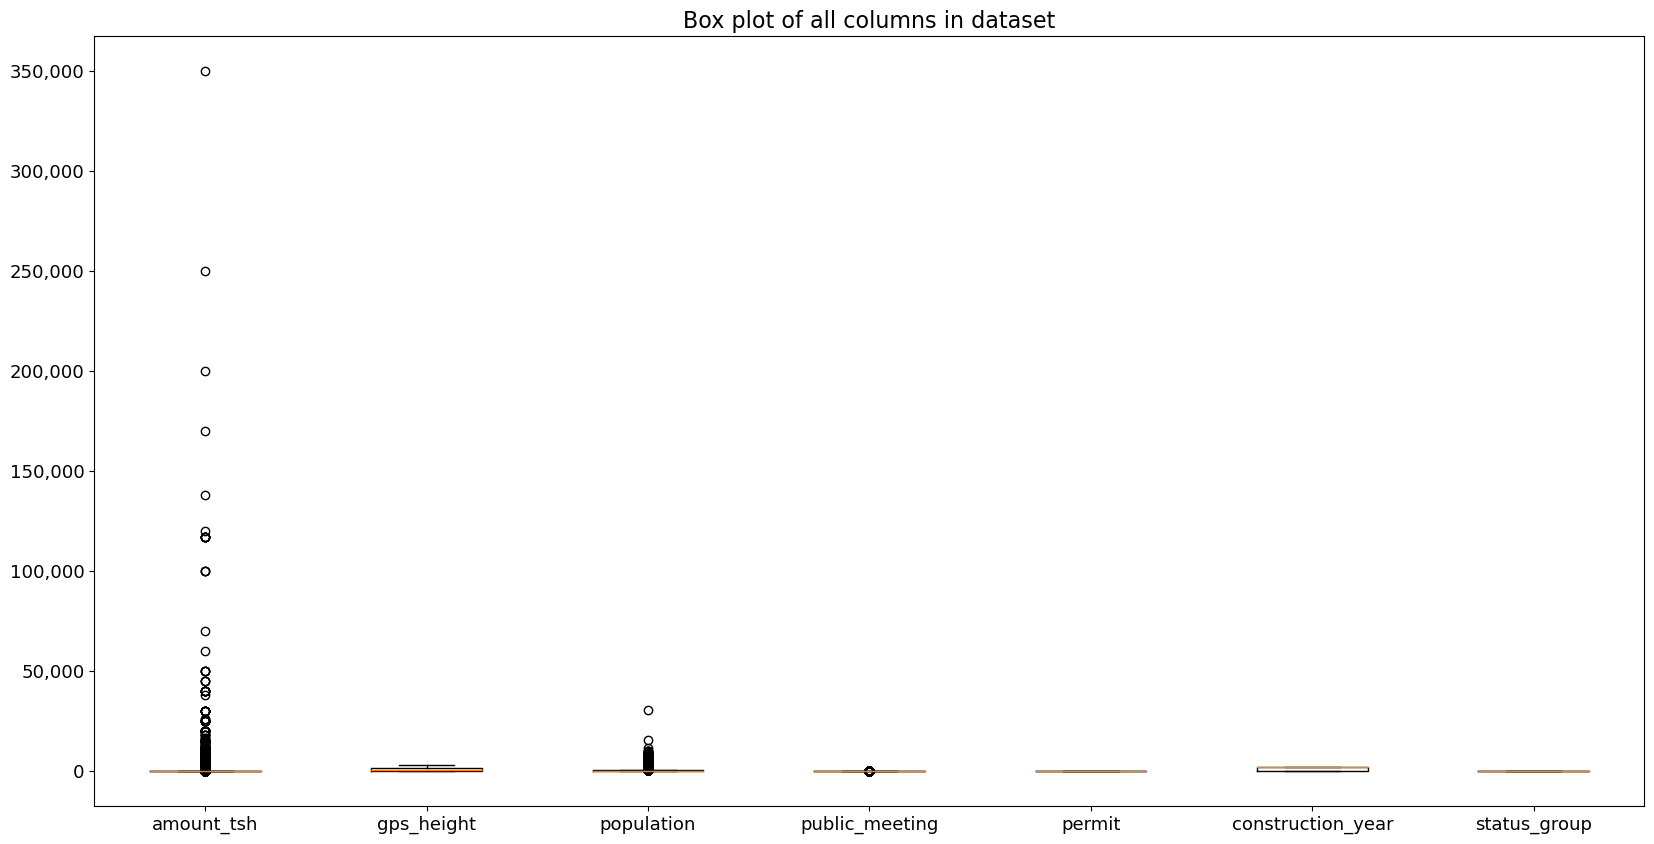

In [57]:
# Importing FuncFormatter
from matplotlib.ticker import FuncFormatter

# Explore the dataset
display(numeric_df.describe())

# Creating a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([numeric_df[col] for col in numeric_df.columns])

plt.xticks(range(1, len(numeric_df.columns.values) +1 ), numeric_df.columns.values, fontsize=13)
plt.yticks(fontsize=13)

# Format y-axis labels with commas at thousands
y_formatter = FuncFormatter(lambda x, pos: "{:,.0f}".format(x))
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.title("Box plot of all columns in dataset", fontsize=16)

plt.show()

The ranges of numbers for each column seem to have largely vary between one another, so the dataset will most likely require to be scaled to be used for modeling.

## 5. Modeling

----------------- Notes ----------------- 

What modeling techniques should we apply?

Begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. 



Be sure to explore:

1. Model features and preprocessing approaches
2. Different kinds of models (logistic regression, k-nearest neighbors, decision trees, etc.)
3. Different model hyperparameters

At minimum you must build three models:

* A simple, interpretable baseline model (logistic regression or single decision tree)
* A more-complex model (e.g. random forest)
* A version of either the simple model or more-complex model with tuned hyperparameters

----------------- Notes ----------------- 

### 5. a. Logistic Regression

#### 5. a. 1. Performing a Train-Test Split

In [58]:
# Splitting df into X and y
X = combined_df.drop('status_group', axis=1)
y = combined_df['status_group']

The dataset is being divided into two separate subsets: a training set, and a testing (or validation) set. The validation set will allow to assess the performance of the model. 

Two parameters are assigned when dividing the dataset:
* random_state=42 
   - setting a random seed of 42 ensures that the data split is reproducible
* stratify=y 
   - stratified sampling ensures the class distribution is maintained in both sets to address potential class imbalance issues

In [59]:
# Performing train-test split with random_state=42 and stratify=y 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Because stratify=y was applied, the percentages of non functional water wells in the train and test target should be similar. 

In [60]:
# Inspecting the percentages of non functional water wells in train and test targets: 
print("Train percent of non functional wells:", y_train.value_counts(normalize=True)[1])
print("Test percent of non functional wells:", y_test.value_counts(normalize=True)[1])

Train percent of non functional wells: 0.45692480359147025
Test percent of non functional wells: 0.4569023569023569


#### 5. a. 2. Building and Evaluating a Baseline Model

We will begin by building  a vanilla logistic regression model that did not go through hyperparameter tuning. The random_state will be set to 42 for reproducibility.

We will then evaluate the model on our training data (X_train and y_train), using the metrics for that purpose: 
- cross_val_score: function producing an accuracy score for each data point in our dataset through cross-validation.  
- log loss: measures how closely the model's predicted probabilities match the actual class labels. A lower log loss indicates better model predictions.

When using cross_val_score, we need to utilize "negative log loss" due to the internal implementation requirements. Consequently, the code negates the result to ensure proper computation.

In [61]:
# Importing the relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [62]:
# Instantiating a LogisticRegression with random_state=42 for reproducibility
baseline_model = LogisticRegression(random_state=42)

In [63]:
# Using cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_neg_log_loss_cv = -(baseline_neg_log_loss_cv.mean())
baseline_neg_log_loss_cv

C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.55603059022353

Log loss is not particularly interpretable - so in order to make more sense of it, the above number will be compared to log loss if we had a model that just chose the majority class: 0. 

In [64]:
# Calculating log loss if we had a model that just chose the majority class: 0 every time 

from sklearn.metrics import log_loss
log_loss(y_train, np.zeros(len(y_train)))

16.469239245541385

Because loss is a metric where lower is better, our baseline model is an improvement (0.556) over simply guessing the majority class every time (16.469).

The value 0.556 will be a useful baseline as we continue modeling to see if we are the predictions are actually improving or just getting slightly better performance by chance.  

#### 5. a. 3. Preprocessing Data Through Custom Cross Validation Function

Preprocessing is an important step in data science pipeline because it transforms raw data into a suitable format for training models. It also contributes to improve model accuracy and performance by handling issues like missing values, removing unnecessary columns, scaling, and encoding categorical variables.

* **Addressing class imbalance - part 2: sampling with SMOTE**

Because we are using preprocessing techniques that differ for train and validation data, we will need a custom function rather than simply preprocessing the entire X_train and using cross_val_score from scikit-learn. 

Due to the presence of a class imbalance, it is advisable to incorporate a resampling technique, with SMOTE being the specific method of choice.<br>
SMOTE stands for synthetic minority oversampling. It creates synthetic examples of the minority class to help train the model. 

<u>Note to self</u>: As opposed to StandardScaler SMOTE is not a scikit-learn transformer. After SMOTE was fit on the training data, the transformer should not be applied on the training and test data. If we were, we would be generating metrics based on synthetic data, not actual one.

* **Scaling data**

Certain variables predominantly have small values: around 0 or 1, whereas others contain values in the thousands. This indicates the need to introduce scaling to standardize and normalize the units of the different columns. 

This is also what caused the ConvergenceWarning to be raised: it shows the logistic regression's gradient descent algorithm is struggling to find an optimal answer. <br>
The StandardScaler method will be used for scaling the dataset's features (independent variables) that are on a different scale.

* **Addressing class imbalance - part 3: StratifiedKFold**

 Stratified K-Fold cross-validation is a technique that ensures that each fold of the data maintains the same class distribution as the whole dataset. This is particularly important when dealing with imbalanced datasets. Using StratifiedKFold allows to get a more robust estimate of the model's performance.

While it does not show it on the above code, cross_val_score also uses `StratifiedKFold` for classification tasks. <br>
`StratifiedKFold` gives the necessary information to make 5 separate train-test split wihtin `X_train`. Then, `cross_val_score` contains other steps to fit and evaluate the provided model. 

Below, we will break down the same code above, but now using `StratifiedKfold`.

In [65]:
# Equivalent of the code above, using StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Creating negative log loss as it doesn't exist as something that can be imported
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiating the model (with same parameters as code above)
baseline_model = LogisticRegression(random_state=42)

# Creating a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Instantiating a splitter object and looping over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extracting train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Cloning the provided model and fit it on the train subset
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluating the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.55603059022353

The log loss result is the same as the baseline log loss initially recorded, since the code essentially does the same as above. 

Now we can tune parameters in order to address the class imbalance.

By setting sampling_strategy=0.85, SMOTE will generate synthetic samples for the minority class to make it larger. It will aim to create enough synthetic samples so that the minority class (non-functional) has 85% as many samples as the majority class.

In [66]:
# Importing relevant sklearn and imblearn classes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def custom_cross_val_score(estimator, X, y):
    # Creating a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiating a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extracting train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiating StandardScaler
        scaler = StandardScaler()
        # Fitting and transforming X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transforming X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Instantiating SMOTE with random_state=42 and sampling_strategy=0.85
        sm = SMOTE(random_state=42, sampling_strategy=0.85)
        # Fitting and transforming X_t_scaled and y_t using sm
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        # Cloning the provided model and fitting it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        # Evaluating the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores

# Running LogisticRegression with the parameters class_weight={1: 0.85} which align with the weighting created by our SMOTE process
model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.85})


preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
- (preprocessed_neg_log_loss_cv.mean())


0.5439387616706302

This improvement is likely due to The combination of better cross-validation, feature scaling, and addressing class imbalance using SMOTE resulted in a lower negative log loss - in other words: a better model performance.

#### 5. a. 4. Building and Evaluating Additional Logistic Regression Models

Using the function created in the previous step, we will build multiple logistic regression models with different hyperparameters in order to minimize log loss.

We also want to verify whether our model is overfitting: have we over-trained on the training data and the model cannot perform well on the test data?
We will then examine and compare the training and validation scores from our existing modeling process.

In [67]:
# Comparing scores between train and test data
print("Train:     ", -preprocessed_train_scores)
print("Validation:", -preprocessed_neg_log_loss_cv)

Train:      [0.54347459 0.54319387 0.54293029 0.54317623 0.54202016]
Validation: [0.54269265 0.54391826 0.54369858 0.54329728 0.54608704]


It does not seem like we are overfitting. If we were, the scores on training data would be significantly better than those on the validation data, despite SMOTE limiting comparing these numbers directly.

#### Verifying if under-fitting

We could be underfitting due to a too high regularization. We will then verify the regularization used by default. 

In [68]:
# Verifying the regularization used by default by our LogisticRegression model. 
model_with_preprocessing.get_params()

{'C': 1.0,
 'class_weight': {1: 0.85},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

That first key-value pair, 'C': 1.0, specifies the regularization strength. <br>C is defined as the inverse of regularization strength and must be a positive float. Smaller values indicate stronger regularization. 

#### Reducing Regularization

We will then instantiate a LogisticRegression model with the same hyperparameters as above, but with a lower regularization, so a higher `C`, before evaluating its performance.

In [69]:
# Instantiating a model with lower regularization
model_less_regularization = LogisticRegression(
    random_state=42,
    class_weight={1: 0.85},
    C=1e5
)

In [70]:
# Evaluating that model using custom_cross_val_score
less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(
    model_less_regularization,
    X_train,
    y_train
)


print("Previous Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print("Current Model")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())

Previous Model
Train average:      0.5429590287181459
Validation average: 0.5439387616706302
Current Model
Train average:      0.54295926022202
Validation average: 0.5439400837684263


By reducing regularization, the results worsen slightly, both on the training set and the validation set. 

#### Alternative Solver

We will try using an alternative solver and type of regularization penalty to improve the model. We were currently using the default solver and type of regularization penalty:

In [71]:
# Printing the current params used 
print("solver:", model_less_regularization.get_params()["solver"])
print("penalty:", model_less_regularization.get_params()["penalty"])

solver: lbfgs
penalty: l2


The `saga` penalty will be used, due to the size of our dataset. <br>
We will then create a model that uses solver="saga" and penalty="elasticnet". We will then use the l1_ratio argument to specify the mixing of L1 and L2 regularization. We will specify this, by assigning a value between zero, to not use only L2 regularization - and less than one, to not use only L1 regularization.

In [72]:
# Trying an alternative solver
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1: 0.85},
    C=1e5,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5
)

# Evaluating its performance
alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Current Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Previous Model (Less Regularization)
Train average:      0.54295926022202
Validation average: 0.5439400837684263
Current Model
Train average:      0.5429589447903653
Validation average: 0.5439392247714141


Results are now better: 

Log loss now shows improvement compared to the previous model. However, despite better log loss results, the model is producing a ConvergenceWarning again.
The tolerance `tol` specifies how close to zero the gradient must be in order to stop taking additional steps. It's possible that your model is finding a gradient that is close enough to zero, but slightly above the default tolerance, if everything otherwise looks good.

In [73]:
# Adding the tolerance parameter
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1: 0.85},
    C=1e5,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5,
    tol=0.0002
    
)

# Evaluating its performance
alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Current Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

Previous Model (Less Regularization)
Train average:      0.54295926022202
Validation average: 0.5439400837684263
Current Model
Train average:      0.5429587898155301
Validation average: 0.5439388664468353


#### 5. a. 5. Choosing and Evaluating a Final Model

Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics in addition to log loss. 

In [74]:
final_model = model_with_preprocessing

In order to evaluate the final model, we will preprocess both the complete training and test data, train the model on the full training data, and then evaluate it on the full validation dataset. Log loss will still be used as the initial evaluation metric. 

####  Preprocessing the Full Dataset

In [75]:
# Instantiate StandardScaler
scaler = StandardScaler()
# Fitting and transforming X_train
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

# Converting into a DataFrame
scaled_df_train = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df_train.head()


# Transforming X_test
X_test_scaled = scaler.transform(X_test)

# Instantiating SMOTE with random_state=42 and sampling_strategy=0.85
sm = SMOTE(random_state=42, sampling_strategy=0.85)

# Fitting and transforming X_train_scaled and y_train using sm
X_train_oversampled, y_train_oversampled =  sm.fit_resample(X_train_scaled, y_train)

In [76]:
# Fitting the final model 
final_model.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(class_weight={1: 0.85}, random_state=42)

####  Evaluating the Model on the Test Data
* **Log loss**
* **Accuracy**
* **Recall**

In [77]:
# Relevant imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Evaluating final_model with log loss
log_loss_reg = log_loss(y_test, final_model.predict_proba(X_test_scaled))
accuracy_reg = accuracy_score(y_test, final_model.predict(X_test_scaled))
recall_reg = recall_score(y_test, final_model.predict(X_test_scaled))

print("Log Loss: {}".format(log_loss_reg))
print("Recall Score: {}".format(recall_reg))
print("Accuracy Score: {}".format(accuracy_reg))

Log Loss: 0.5437687306560569
Recall Score: 0.48312453942520267
Accuracy Score: 0.712996632996633


This model has improved log loss compared to our initial baseline model by 0.00799, which had about 0.555189.

The model performance is slightly better when training on the full training set - which is rather typical, since models' performance improve, as data increases.

#### Accuracy
The model has an accuracy of 0.71299 - which means it correctly identifies the deficiency of a water well about 71.2% of the time, whereas always guessing that a well is non functional would only be accurate about 45.7% of the time.

#### Recall

Due to the data's context, **recall**  is the important metric to report, as false negatives are a bigger problem: if a well is labeled as functional (0) when it really is non-functional (1) - in which case, it would be a false negative, the consequences would be dramatic: populations' health could be negatively impacted if they were to drink this well's water.

With a recall of about 0.48312, there is about 48.02% that our model will correctly label a well as class 1: on functional. And about 51.98% chance our model will incorrectly label it as class 0 - functional. 

#### 5. a. 6. Scores' Summary

In [78]:
log_loss_reg, accuracy_reg, recall_reg

(0.5437687306560569, 0.712996632996633, 0.48312453942520267)

* Log loss on test: 0.5435123636083194
* Accuracy: 0.7125252525252526
* Recall: 0.4801768607221813

#### 5. b. 2????????. Recursive Feature Elimination

Now that we have a baseline model with a certain accuracy, let's see if we can improve its scores by diminishing the number of features. 

In [79]:
# Importing the necessary library
from sklearn.feature_selection import RFE

In [80]:
# We will use the scaled data 

In [81]:
log_loss_scores = []
accuracy_scores = []
recall_scores = []

for n in range(5, 51, 5):
    # Instantiating the RFE object with our final model - and trying with 5 features
    rfe = RFE(estimator=final_model, n_features_to_select=n)

    # Fitting the RFE object to the training data 
    rfe.fit(X_train_oversampled, y_train_oversampled)

    # Accessing the ranking of features
    feature_ranking = rfe.ranking_
    feature_support = rfe.support_ 

    # Using the top selected features 
    selected_features = X_train_oversampled[:, feature_support]

    # Fitting the final Logistic Regression model using the selected features 
    final_model.fit(selected_features, y_train_oversampled)

    # Using the top selected features on validation data
    selected_X_test_scaled = X_test_scaled[:, feature_support]
    
    # Evaluating final_model with log loss
    log_loss_reg_selected = log_loss(y_test, final_model.predict_proba(selected_X_test_scaled))
    accuracy_reg_selected = accuracy_score(y_test, final_model.predict(selected_X_test_scaled))
    recall_reg_selected = recall_score(y_test, final_model.predict(selected_X_test_scaled))
    
    # Record each score into their variable
    log_loss_scores.append(log_loss_reg_selected)
    accuracy_scores.append(accuracy_reg_selected)
    recall_scores.append(recall_reg_selected)
    
    # Print evaluation scores
    
    print("Number of features: {}".format(n))
    print("Log Loss: {}".format(log_loss_reg_selected))
    print("Recall Score: {}".format(recall_reg_selected))
    print("Accuracy Score: {}".format(accuracy_reg_selected))
    print()
    print()

    
# Adding final model's records
log_loss_scores.append(log_loss_reg)
accuracy_scores.append(accuracy_reg)
recall_scores.append(recall_reg)
    
    
# Print final model scores: with 53 features
    
print("Number of features: 53")
print("Log Loss: {}".format(log_loss_reg))
print("Recall Score: {}".format(recall_reg))
print("Accuracy Score: {}".format(accuracy_reg))
print()
print()

Number of features: 5
Log Loss: 0.5760099930466043
Recall Score: 0.3663964627855564
Accuracy Score: 0.691986531986532


Number of features: 10
Log Loss: 0.5614962020811218
Recall Score: 0.44097273397199704
Accuracy Score: 0.6987878787878787


Number of features: 15
Log Loss: 0.5529510510120974
Recall Score: 0.4546794399410464
Accuracy Score: 0.7088215488215488


Number of features: 20
Log Loss: 0.547401572047656
Recall Score: 0.46543846720707444
Accuracy Score: 0.7111111111111111


Number of features: 25
Log Loss: 0.5455984589040641
Recall Score: 0.4810611643330877
Accuracy Score: 0.7117171717171717


Number of features: 30
Log Loss: 0.5449018185834009
Recall Score: 0.48179808400884305
Accuracy Score: 0.7090909090909091


Number of features: 35
Log Loss: 0.5441150910932093
Recall Score: 0.479587324981577
Accuracy Score: 0.7103030303030303


Number of features: 40
Log Loss: 0.5437092711172613
Recall Score: 0.48518791451731763
Accuracy Score: 0.7141414141414142


Number of features: 45
L

Now, we have run and evaluated the models with all features. We will now determine the ones that recorded the top values. 

In [82]:
# Making copies of scores to retrieve their best values 
log_loss_scores_list = log_loss_scores.copy() 
accuracy_scores_list = accuracy_scores.copy()
recall_scores_list = recall_scores.copy()

In [83]:
# Find the maximum value and its index
max_value_rec = max(recall_scores_list)
max_index_rec = recall_scores_list.index(max_value_rec)

print("Maximum value recall:", max_value_rec)
print("Index of maximum value recall:", max_index_rec)

Maximum value recall: 0.4866617538688283
Index of maximum value recall: 8


In [84]:
# Find the maximum value and its index
min_value = min(log_loss_scores_list)
min_index = log_loss_scores_list.index(min_value)
# Remove the minimum value to verify the second minimum value 
log_loss_scores_list.remove(min_value)
second_min_value = min(log_loss_scores_list)
second_min_index = log_loss_scores_list.index(second_min_value)

print("Minimum log loss:", min_value)
print("Index of minimum log loss:", min_index)
print("Index of second minimum log loss:", second_min_index)

Minimum log loss: 0.5437092711172613
Index of minimum log loss: 7
Index of second minimum log loss: 8


In [85]:
# Find the maximum value and its index
max_value_acc = max(accuracy_scores_list)
max_index_acc = accuracy_scores_list.index(max_value_acc)
# Remove the maximum value to verify the second max value 
accuracy_scores_list.remove(max_value_acc)
second_max_value = max(accuracy_scores_list)
second_max_index_acc = accuracy_scores_list.index(second_max_value)

print("Maximum accuracy:", max_value_acc)
print("Index of maximum accuracy:", max_index_acc)
print("Index of second maximum accuracy:", second_max_index_acc)

Maximum accuracy: 0.7141414141414142
Index of maximum accuracy: 7
Index of second maximum accuracy: 7


We will plot this on a chart to visualize each model's scores 

In [86]:
print(len(log_loss_scores))
print(len(accuracy_scores))
print(len(recall_scores))

11
11
11


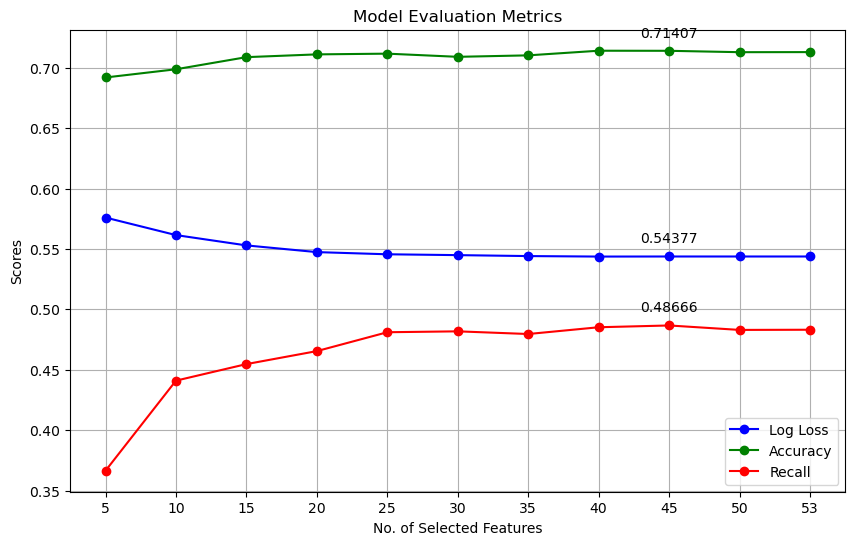

In [87]:
# Create the x-axis values 
x = range(1, 12)

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, log_loss_scores, label='Log Loss', marker='o', linestyle='-', color='blue')
plt.plot(x, accuracy_scores, label='Accuracy', marker='o', linestyle='-', color='green')
plt.plot(x, recall_scores, label='Recall', marker='o', linestyle='-', color='red')

# Customize x-axis tick locations and labels
x_ticks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 53]
plt.xticks(x, x_ticks)

# Add labels and title
plt.xlabel('No. of Selected Features')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')

# Add a legend
plt.legend()

# Show the data label of the selected index
index_to_annotate = 8  # 8th index
plt.annotate(f'{log_loss_scores[index_to_annotate]:.5f}', (x[index_to_annotate], log_loss_scores[index_to_annotate]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'{accuracy_scores[index_to_annotate]:.5f}', (x[index_to_annotate], accuracy_scores[index_to_annotate]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'{recall_scores[index_to_annotate]:.5f}', (x[index_to_annotate], recall_scores[index_to_annotate]), textcoords="offset points", xytext=(0,10), ha='center')



# Show the plot
plt.grid(True)
plt.show()

In [89]:
# Instantiating the RFE object with our final model - and trying with 45 features
best_rfe = RFE(estimator=final_model, n_features_to_select=45)

# Fitting the RFE object to the training data 
best_rfe.fit(X_train_oversampled, y_train_oversampled)

# Accessing the ranking of features
feature_ranking = best_rfe.ranking_
feature_support = best_rfe.support_ 

# Using the top selected features 
selected_features = X_train_oversampled[:, feature_support]

# Fitting the final Logistic Regression model using the selected features 
final_model.fit(selected_features, y_train_oversampled)

# Using the top selected features on validation data
selected_X_test_scaled = X_test_scaled[:, feature_support]

# Evaluating final_model with log loss
log_loss_reg_selected = log_loss(y_test, final_model.predict_proba(selected_X_test_scaled))
accuracy_reg_selected = accuracy_score(y_test, final_model.predict(selected_X_test_scaled))
recall_reg_selected = recall_score(y_test, final_model.predict(selected_X_test_scaled))

# Record each score into their variable
log_loss_scores.append(log_loss_reg_selected)
accuracy_scores.append(accuracy_reg_selected)
recall_scores.append(recall_reg_selected)

# Print evaluation scores

print("Number of features: {}".format(45))
print("Log Loss: {}".format(log_loss_reg_selected))
print("Recall Score: {}".format(recall_reg_selected))
print("Accuracy Score: {}".format(accuracy_reg_selected))
print()
print()

Number of features: 45
Log Loss: 0.5437699554671055
Recall Score: 0.4866617538688283
Accuracy Score: 0.7140740740740741




In [90]:
for i, col in zip(range(scaled_df_train.shape[1]), scaled_df_train.columns):
    print(f"{col} selected={best_rfe.support_[i]} rank={best_rfe.ranking_[i]}")

amount_tsh selected=True rank=1
gps_height selected=True rank=1
population selected=True rank=1
public_meeting selected=True rank=1
permit selected=True rank=1
construction_year selected=True rank=1
basin_Internal selected=True rank=1
basin_Lake Nyasa selected=True rank=1
basin_Lake Rukwa selected=True rank=1
basin_Lake Tanganyika selected=True rank=1
basin_Lake Victoria selected=True rank=1
basin_Pangani selected=True rank=1
basin_Rufiji selected=True rank=1
basin_Ruvuma / Southern Coast selected=True rank=1
basin_Wami / Ruvu selected=True rank=1
extraction_type_class_gravity selected=False rank=6
extraction_type_class_handpump selected=True rank=1
extraction_type_class_motorpump selected=False rank=5
extraction_type_class_other selected=True rank=1
extraction_type_class_rope pump selected=True rank=1
extraction_type_class_submersible selected=True rank=1
extraction_type_class_wind-powered selected=False rank=7
management_board_n_trust selected=True rank=1
management_government select

### 5. b. K-Nearest Neighbors

* **Training speed**: Fast. In theory it's just saving the training data for later, although the scikit-learn implementation has some additional logic "under the hood" to make prediction faster.<br>
* **Prediction speed**: Very slow. The model has to look at every record in the training set to find the k closest to the new record.<br>
* **Requires scaling**: Yes. The algorithm to find the nearest records is distance-based, so it matters that distances are all on the same scale.<br>
* **Key hyperparameters**: n_neighbors (how many nearest neighbors to find; too few neighbors leads to overfitting, too many leads to underfitting), p and metric (what kind of distance to use in defining "nearest" neighbors)

#### 5. a. 1. Preparing Data for Modeling

X and y were defined for the Logistic Regression model

In [91]:
# Verifying X and y
X.head()
y.head()

0    0
1    0
2    0
3    1
4    0
Name: status_group, dtype: int64

In [92]:
# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

As we have seen when preparing data for Logistic Regression, columns have numbers in large ranges and data needs to be normalized. 

Normalization is done after splitting the data into training and test sets on purpose. This is prevent data leakage from the test set into the training set. 

Especially with K-NN classification, scaling the data ensures that all features contribute equally to the distance metrics. 

In [93]:
# Instantiating StandardScaler and fitting it on X_train
scaler = StandardScaler()
# scaler.fit(X_train)

In [94]:
# Fitting and transforming train set - and transforming test set 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Scaled data was transformed into a DataFrame earlier
# Inspecting it
scaled_df_train.head()

amount_tsh  gps_height  population  public_meeting    permit  \
0   -0.096832    0.772560    0.239329        0.403473  0.727060   
1   -0.083585   -0.965035   -0.389074        0.403473  0.727060   
2   -0.098989   -0.965035   -0.391256        0.403473 -1.375402   
3   -0.095908    0.675867   -0.063963        0.403473  0.727060   
4   -0.098989   -0.965035   -0.391256        0.403473  0.727060   

   construction_year  basin_Internal  basin_Lake Nyasa  basin_Lake Rukwa  \
0           0.741540       -0.388299         -0.306380         -0.204243   
1           0.744695       -0.388299         -0.306380         -0.204243   
2          -1.370154       -0.388299          3.263917         -0.204243   
3           0.732075       -0.388299         -0.306380         -0.204243   
4          -1.370154       -0.388299         -0.306380         -0.204243   

   basin_Lake Tanganyika  ...  source_type_rainwater harvesting  \
0              -0.347863  ...                         -0.201786   
1              -0.347863  ...                         -0.201786   
2              -0.347863  ...                         -0.201786   
3              -0.347863  ...                         -0.201786   
4              -0.347863  ...                         -0.201786   

   source_type_river/lake  source_type_shallow well  source_type_spring  \
0               -0.459124                 -0.629063            1.575555   
1               -0.459124                 -0.629063           -0.634697   
2               -0.459124                 -0.629063            1.575555   
3               -0.459124                 -0.629063            1.575555   
4               -0.459124                  1.589666           -0.634697   

   installer_organization_NPO_NGO  installer_organization_bilateral  \
0                       -0.257685                         -0.212915   
1                       -0.257685                         -0.212915   
2                       -0.257685                         -0.212915   
3                       -0.257685                         -0.212915   
4                       -0.257685                         -0.212915   

   installer_organization_community  installer_organization_government  \
0                         -0.184593                          -0.825307   
1                         -0.184593                          -0.825307   
2                         -0.184593                          -0.825307   
3                         -0.184593                          -0.825307   
4                         -0.184593                           1.211670   

   installer_organization_religious  installer_organization_unknown_n_minor  
0                         -0.247222                                1.228188  
1                         -0.247222                                1.228188  
2                         -0.247222                                1.228188  
3                         -0.247222                                1.228188  
4                         -0.247222                               -0.814208  

[5 rows x 53 columns]

#### 5. b. 2. Building a Baseline kNN Model

We will first build an initial kNN model with the default hyperparameters. 

On this model, we will make predictions on the test set to measure its accuracy. 

In [96]:


# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Fitting the classifier
knn_baseline_model.fit(X_train_scaled, y_train)

# Predicting on the test set
test_preds = knn_baseline_model.predict(X_test_scaled)


NameError: name 'KNeighborsClassifier' is not defined

####  Evaluating the Baseline kNN Model

In order to evaluate the model, similar to Logistic Regression, cross_val_score will be used, with the scoring="neg_log_loss". As done on previous models, the mean of the cross-validated scores with be calculated and values negated. 
We will also evaluate the models using the two selected evaluation metrics: **Accuracy and Recall**. The evaluation will be done by passing the functions a set of `labels` (actual values) and a set of `preds` (predictions produced by the model). 

In [ ]:
# Importing the necessary functions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, accuracy_score

# Performing cross-validation
knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

# Defining a function to print the evaluation metrics
def print_metrics(log_loss, labels, preds):
    print("Log Loss: {}".format(log_loss))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))


print_metrics(knn_baseline_log_loss, y_test, test_preds)

* **Log Loss**: A log loss above 1 suggests that the model's predictions are less confident or less accurate.

* **Accuracy**: An accuracy score of about 0.7651 (76.51%) indicates that the model correctly predicted 76.51% of all instances in the dataset.  

* **Recall**: A recall score of about 0.7026 (76.51%) means that the model correctly identified roughly 70.26% of all actual positive instances in the dataset. 




---- This metric is particularly important when you want to minimize false negatives. ----

The negative log loss resulting from the baseline KNN model is far larger than the one recorded on our Logistic Regression models. 

We will then try to fine tune the parameters to see whether the model can make more accurate predictions.

#### 5. b. 3. Building Iterative Models to Find the Best kNN Model

<u>n_neighbors=50</u>

Maybe we are overfitting, since the default neighbors of 5 seems small compared to the large number of records in this dataset. Let's increase that number of neighbors 10x to see if it improves the results

In [ ]:
# Trying other models
# Instantiating a model with 50 neighbors 
knn_second_model = KNeighborsClassifier(n_neighbors=50)

# Fitting the second classifier 
knn_second_model.fit(X_train_scaled, y_train)

# Predicting on the test set
second_test_preds = knn_second_model.predict(X_test_scaled)

####  Evaluating kNN Model with 50 neighbors

In [ ]:
# Performing cross-validation
knn_second_model_log_loss = -cross_val_score(knn_second_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()


# Printing the evaluation metrics using the previously defined function
print_metrics(knn_second_model_log_loss, y_test, second_test_preds)

Best so far. 



---------- More here ----------

In [ ]:
# What if we keep that number of neighbors, and change the distance metric 
# from euclidean to manhattan?

<u>n_neighbors=50, metric='manhattan'</u>

In [ ]:
# Trying other models
# Instantiating a model with 50 neighbors 
knn_third_model = KNeighborsClassifier(n_neighbors=50, metric="manhattan")

# Fitting the second classifier 
knn_third_model.fit(X_train_scaled, y_train)

# Predicting on the test set
third_test_preds = knn_third_model.predict(X_test_scaled)

####  Evaluating kNN Model with 50 neighbors and metric 'manhattan'

In [ ]:
# Performing cross-validation
knn_third_model_log_loss = -cross_val_score(knn_third_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()


# Printing the evaluation metrics using the previously defined function
print_metrics(knn_third_model_log_loss, y_test, third_test_preds)

<u>n_neighbors=75, metric='manhattan'</u>

In [ ]:
# Can we improve performance if increasing the number of neighbors again
# Instantiating a model with 50 neighbors 
knn_fourth_model = KNeighborsClassifier(n_neighbors=75, metric="manhattan")

# Fitting the second classifier 
knn_fourth_model.fit(X_train_scaled, y_train)

# Predicting on the test set
fourth_test_preds = knn_fourth_model.predict(X_test_scaled)

####  Evaluating kNN Model with 75 neighbors and metric 'manhattan'

In [ ]:
# Performing cross-validation
knn_fourth_model_log_loss = -cross_val_score(knn_fourth_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()


# Printing the evaluation metrics using the previously defined function
print_metrics(knn_fourth_model_log_loss, y_test, fourth_test_preds)

Best best best so far. 


---------- More here ----------

#### 5. b. 4. Choosing and Evaluating the Best Model

In [ ]:
knn_best_model = knn_fourth_model

#### 5. b. 5. Scores' Summary

In [ ]:
# Calculate accuracy and recall

In [ ]:
# Summarize

### 5. c. Decision Trees

* **Training speed**: Slow. The model is considering splits based on as many as all of the available features, and it can split on the same feature multiple times. This requires exponential computational time that increases based on the number of columns as well as the number of rows.<br>
* **Prediction speed**: Medium fast. Producing a prediction with a decision tree means applying several conditional statements, which is slower than something like logistic regression but faster than kNN.<br>
* **Requires scaling**: No. This model is not distance-based. You also can use a LabelEncoder rather than OneHotEncoder for categorical data, since this algorithm doesn't necessarily assume that the distance between 1 and 2 is the same as the distance between 2 and 3.<br>
* **Key hyperparameters**: Many features relating to "pruning" the tree. By default they are set so the tree can overfit, and by setting them higher or lower (depending on the hyperparameter) you can reduce overfitting, but too much will lead to underfitting. These are: max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, and min_impurity_decrease. You can also try changing the criterion to "entropy" or the splitter to "random" if you want to change the splitting logic.

#### 5. c. 2. Building a Baseline Decision Tree Model

Build and evaluate a baseline decision tree model, using default hyperparameters (with the exception of random_state=42 for reproducibility).

(Use cross-validated log loss, just like with the previous models.)

Before starting  baseline decision tree model, we have been working with all the features from the data set and would like to ensure 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree_baseline_model = DecisionTreeClassifier(random_state=42)

dtree_baseline_log_loss = -cross_val_score(dtree_baseline_model, X_train, y_train, scoring="neg_log_loss").mean()
dtree_baseline_log_loss

"""
This is much worse than either the logistic regression or the
kNN models. We can probably assume that the model is badly
overfitting, since we have not "pruned" it at all.
"""

#### 5. b. 3. Building Iterative Models to Find the Best Decision Tree Model

"""
There are a lot of ways to reduce overfitting in this
model, so it can be overwhelming to choose which one
to try!

Let's start with increasing min_samples_leaf by an
order of magnitude. This is conceptually the most 
similar to increasing the number of neighbors, although
the process for determining similarity of neighbors and
samples in the same leaf is quite different.
"""

As opposed to modeling with  k-Nearest Neighbors, scaling is not necessarily required when using a Decision Tree classifier. 
Since Decision Trees make splits based on individual features, they are not impacted by the scale of other ones.

In [ ]:
dtree_second_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)

dtree_second_log_loss = -cross_val_score(dtree_second_model, X_train, y_train, scoring="neg_log_loss").mean()
dtree_second_log_loss

In [ ]:
"""
Ok, increasing the minimum samples per leaf from 1 to 10
helped reduce overfitting. What if we increase them again?
"""

dtree_third_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100)

dtree_third_log_loss = -cross_val_score(dtree_third_model, X_train, y_train, scoring="neg_log_loss").mean()
dtree_third_log_loss

In [ ]:
# Your code here (add more cells as needed)


"""
Now we are getting scores in the same range as the best
logistic regression model or the baseline kNN model

Wait, we just realized that this is a very imbalanced dataset,
but we haven't told the model that. Let's try using the same
min_samples_leaf as before, and also specifying the class weight
"""

dtree_fourth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, class_weight="balanced")

dtree_fourth_log_loss = -cross_val_score(dtree_fourth_model, X_train, y_train, scoring="neg_log_loss").mean()
dtree_fourth_log_loss

In [ ]:
"""
Oh well, sometimes that backfires when the model overcompensates
trying to create the right balance. We'll leave off the
class_weight hyperparameter for now.

We also notice that this dataset has a lot of dimensions. What if
we limit the number of features that can be used in a given split,
while keeping min_samples_leaf the same?
"""

dtree_fifth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, max_features="sqrt")

dtree_fifth_log_loss = -cross_val_score(dtree_fifth_model, X_train, y_train, scoring="neg_log_loss").mean()
dtree_fifth_log_loss

In [ ]:
"""
Still not better than dtree_third_model

Let's try one more value for min_samples_leaf
"""

dtree_sixth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=75)

dtree_sixth_log_loss = -cross_val_score(dtree_sixth_model, X_train, y_train, scoring="neg_log_loss").mean()
dtree_sixth_log_loss

### 5. d. Hyperparameter Tuning with Combinatoric Grid Searching

Since we could not get results as good as we did through KNN, using Decision Trees, let's try to search for optimal hyperparameters using Combinatoric Grid Searching - or GridSearchCV.  
We will instantiate a baseline DecisionTreeClassifier, without including any parameter to ensure they can be optimized through GridSearchCV. 

In [ ]:
# Struggled to get better results through Decision Trees than through KNN
# Let's see if we can get better ones through hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiating a DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Performing a 3-fold cross-validation on the training data using this classifier
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)

# Calculating the mean cross-validation score from the model
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

--------------------How does this compare to other scores?--------------------

In [ ]:
# Creating the Grid Search

dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion (impurity function)
    'splitter': ['best', 'random'],    # Strategy to choose the split at each node
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}

We now can use this dt_param_grid dictionary as an argument when creating our GridSearchCV object

Grid Search trains a model on the dataset for every distinct set of parameters, ultimately providing the configuration that produced the best-performing model. To prevent the influence of random variations, it is common practice to apply K-Fold cross-validation. Here, we chose K=3 so 3 different models will be trained for each of the unique parameter combination. 

In [ ]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_grid_search.predict(X_test)

<u>Examining the best parameters</u> 

In [ ]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
# Define log loss as the scoring metric (with a 'neg_' prefix to get the negative log loss)
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Performing cross-validation using log loss as the scoring metric
log_loss_cv_score = cross_val_score(dt_grid_search, X_train, y_train, cv=3, scoring=log_loss_scorer)

In [ ]:
mean_log_loss_cv_score = -np.mean(log_loss_cv_score)  # Negate the mean value to get the positive log loss value

print(f"Mean Log Loss Score: {mean_log_loss_cv_score:.4f}")

#### 5. b. 4. Choosing and Evaluating the Best Model

#### 5. b. 5. Scores' Summary

## 6. Evaluation

Which model best meets the business objectives?

After you finish refining your models, you should provide 1-3 paragraphs in the notebook discussing your final model.

Choosing the right **classification metrics**

## 7. Findings & Recommendations

**Predictive** approach

A predictive finding might include:

* How well your model is able to predict the target
* What features are most important to your model


A predictive recommendation might include:

* The contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem
* Suggestions for how the business might modify certain input variables to achieve certain target results

## 8. Limits & Next Steps

## \*\*Appendix \*\*